In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import os
os.getcwd()

'/Users/gabrielperez/Desktop/analise_de_dados/Series Temporais'

In [3]:
data = pd.read_excel ('teste.xls')
data['Var1'] = data['Var1'].apply(lambda x: round(x, 4))
data.head()

,Var1
0,100.0194
1,103.9771
2,100.5608
3,99.4196
4,99.8989


In [4]:
print(type(data['Var1'][1]))

<class 'numpy.float64'>


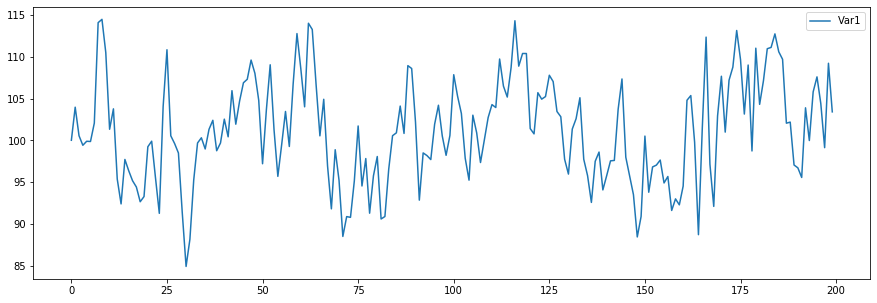

In [5]:
data.plot(figsize=(15,5))

In [6]:
ACF, q, pq = ts.acf(data['Var1'], qstat=True, fft = False)

In [7]:
tabela = np.c_[range(1,41), ACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "AC", "Q", "Prob(>Q)"])

In [8]:
tabela.head()

,lag,AC,Q,Prob(>Q)
0,1.0,0.648355,85.340220,2.512013e-20
1,2.0,0.396029,117.341655,3.308137e-26
2,3.0,0.360594,144.007260,5.168184e-31
3,4.0,0.306134,163.324594,2.830236e-34
4,5.0,0.156588,168.404566,1.597629e-34


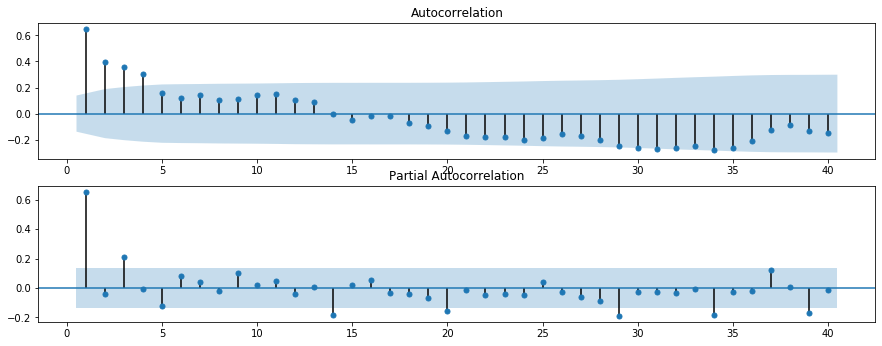

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data['Var1'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data['Var1'], lags=40, zero=False, ax=ax2)


In [10]:
ma1 = sm.tsa.ARMA(data, (0,1))
ma1 = ma1.fit()

In [11]:
ma1.params

const         101.100362
ma.L1.Var1      0.593881
dtype: float64

In [12]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Var1   No. Observations:                  200
Model:                     ARMA(0, 1)   Log Likelihood                -602.782
Method:                       css-mle   S.D. of innovations              4.923
Date:                Tue, 11 Feb 2020   AIC                           1211.565
Time:                        20:58:06   BIC                           1221.460
Sample:                             0   HQIC                          1215.569
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1004      0.554    182.554      0.000     100.015     102.186
ma.L1.Var1     0.5939      0.048     12.256      0.000       0.499       0.689
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6838           +0.0000j            1.6838            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
sm.stats.durbin_watson(ma1.resid.values)

1.6500777320917355

In [14]:
residuo = ma1.resid
residouquad = residuo**2
estimado = ma1.predict()

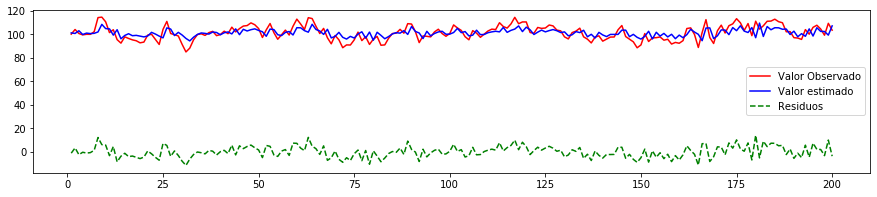

In [15]:
x = range(1,len(data)+1)
fig, axes  =  plt.subplots(figsize = (15, 3))
axes.plot(x, data['Var1'], 'r', label = 'Valor Observado') 
axes.plot(x, estimado, 'b',  label = 'Valor estimado')
axes.plot(x, residuo, 'g--', label = 'Residuos')
axes.legend()

In [16]:
ACF, q, pq = ts.acf(residuo, qstat=True, fft = False)
tabela = np.c_[range(1,41), ACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "Q", "Prob(>Q)"])
tabela.head()

,lag,ACF,Q,Prob(>Q)
0,1.0,0.173472,6.109219,1.344785e-02
1,2.0,0.304200,24.990679,3.744062e-06
2,3.0,0.166361,30.666365,9.992659e-07
3,4.0,0.264269,45.061613,3.860396e-09
4,5.0,0.032216,45.276644,1.274612e-08


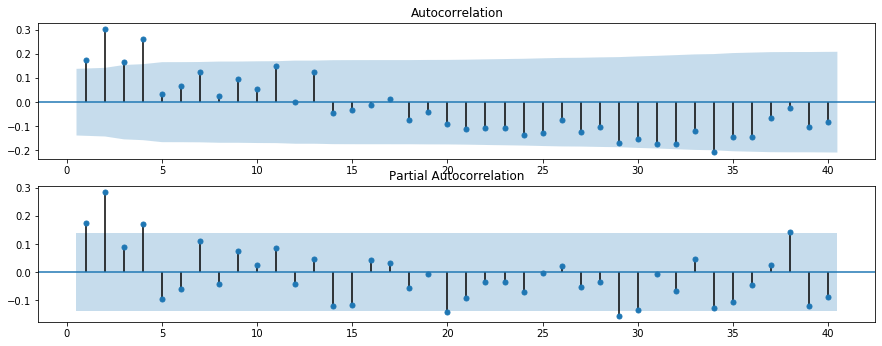

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))

fig = plot_acf(residuo, lags=40, zero=False, ax=ax1)
fig = plot_pacf(residuo, lags=40, zero=False, ax=ax2)

In [18]:
varerro = ma1.sigma2
residpad = residuo.values/np.sqrt(varerro)
n = len(residpad)

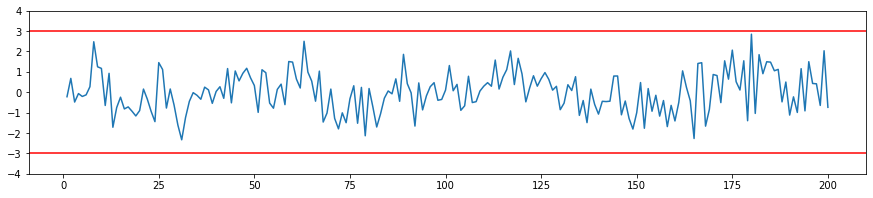

In [19]:
fig, axes = plt.subplots(figsize = (15, 3))
axes.plot(range(1, n + 1), residpad)
axes.set_ylim([-4, 4])
axes.axhline(y = 3, color = 'r')
axes.axhline(y = -3, color = 'r')

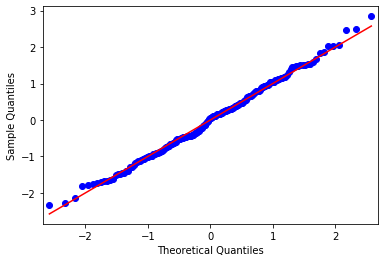

In [20]:
fig = sm.qqplot(residpad, scipy.stats.norm, fit=True, line='s')

(array([ 3., 16., 19., 32., 28., 42., 24., 17., 13.,  3.,  3.]),
 array([-2.33169757, -1.86081457, -1.38993158, -0.91904858, -0.44816558,
         0.02271742,  0.49360042,  0.96448342,  1.43536641,  1.90624941,
         2.37713241,  2.84801541]),
 <a list of 11 Patch objects>)

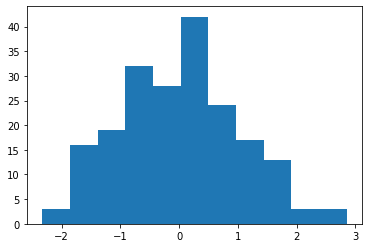

In [21]:
plt.hist(residpad, bins = 'auto')

In [22]:
stat, p = scipy.stats.shapiro(data['Var1'])
print(f'Estatistica de teste: {stat}; \nP-valor: {p}')

Estatistica de teste: 0.9917309284210205; 
P-valor: 0.3145197927951813


In [23]:
stats, p, alpha = scipy.stats.anderson(data['Var1'], dist = 'norm')
print(f'Estatistica de teste: {stat}; \nP-valor: {p[2]}')

Estatistica de teste: 0.9917309284210205; 
P-valor: 0.772


In [24]:
stat, p = scipy.stats.jarque_bera(data['Var1'])
print(f'Estatistica de teste: {stat}; \nP-valor: {p}')

Estatistica de teste: 2.1751231790329593; 
P-valor: 0.3370373278883445
